# Numerical Differentiation

calculate the derivative of the function

f(x)=sin(x) at x=1.0 radian

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd  

def func(x):
  return np.sin(x)

# def func_tst(x):
#   return x*math.exp(x)
# print(func_tst(2.1))


# Three numerical differentiation methods: Observations

1. np.cos(x): used as "exact" value

2. three-point endpoint formula

3. five-point midpoint formula

**Observations:**
*   as h->0, we are moving toward more accurate results($-0.2\le h\le 0.2$ with a step-size of 0.01). **Please note that I do not mean h gets really closes to 0 when I say "approaches to 0".**
*   five-point midpoint formula does better than three-point midpoint formula in approximating the derivatives of function at a given value($-0.2\le h\le 0.2$ with a step-size of 0.01).

see discussions in "Analysis and Discussion 1" and "Analysis and Discussion 2" sections.

And there are many more(three-point midpoint, five-point endpoint, forward difference, backward difference, central difference...).

For the time sake, we will only talk about those three methods.




**calculate the derivative of the function(exact)**

In [ ]:
#the derivative of sin(x) is cos(x)
dexact=np.cos(1)
print("The exact value for the numerical differentiation:",dexact)

The exact value for the numerical differentiation: 0.5403023058681398


**three-point endpoint estimations with various hs**

In [ ]:
def three_p_endpoint(f,x,h):
  return 1/(2*h)*(-3*f(x)+4*f(x+h)-f(x+2*h))

def three_p_mid(f,x,h):
  return 1/(2*h)*(f(x+h)-f(x-h))
#print(three_p_endpoint(func_tst,2,-0.1))
# print(three_p_mid(func_tst,2,0.2))


hvec=np.arange(-20,21,1)
# print(hvec)
hvec=hvec[hvec!=0]
hvec=hvec/100
# print(hvec)

def threep_end_multiple(f,x,hvec):
  n=len(hvec)
  fp1=np.zeros(n)
  for i in range(0,n):
    fp1[i]=three_p_endpoint(f,x,hvec[i])
  return fp1

In [ ]:
fpe=threep_end_multiple(func,1,hvec)
df1=pd.DataFrame(np.zeros((5,40)),['h','3-p endpoint value','exact value','abs error','rel error in%'])
df1.loc['h']=hvec
df1.loc['3-p endpoint value']=fpe
df1.loc['exact value']=dexact
df1.loc['abs error']=abs(df1.loc['3-p endpoint value']-df1.loc['exact value'])
df1.loc['rel error in%']=df1.loc['abs error']/df1.loc['3-p endpoint value']*100
df1

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
h,-0.200000,-0.190000,-0.180000,-0.170000,-0.160000,-0.150000,-0.140000,-0.130000,-0.120000,-0.110000,...,0.110000,0.120000,0.130000,0.140000,0.150000,0.160000,0.170000,0.180000,0.190000,0.200000
3-p endpoint value,0.549078,0.548156,0.547292,0.546483,0.545730,0.545030,0.544383,0.543789,0.543245,0.542752,...,0.542193,0.542520,0.542867,0.543233,0.543615,0.544014,0.544426,0.544851,0.545288,0.545734
exact value,0.540302,0.540302,0.540302,0.540302,0.540302,0.540302,0.540302,0.540302,0.540302,0.540302,...,0.540302,0.540302,0.540302,0.540302,0.540302,0.540302,0.540302,0.540302,0.540302,0.540302
abs error,0.008775,0.007854,0.006990,0.006181,0.005427,0.004728,0.004081,0.003487,0.002943,0.002449,...,0.001891,0.002218,0.002565,0.002930,0.003313,0.003711,0.004124,0.004549,0.004986,0.005432
rel error in%,1.598199,1.432813,1.277120,1.131049,0.994517,0.867432,0.749688,0.641170,0.541752,0.451300,...,0.348689,0.408788,0.472464,0.539445,0.609456,0.682222,0.757468,0.834918,0.914296,0.995328


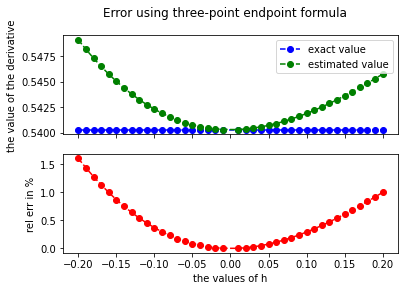

In [ ]:
def plot_error(X,Y,Y1,Z,ttl):
  fig, axs=plt.subplots(2,sharex=True)
  axs[0].plot(X,Y,'bo--',label='exact value')
  axs[0].plot(X,Y1,'go--',label='estimated value')
  axs[0].set_ylabel("the value of the derivative")
  axs[0].legend()
  axs[1].plot(X,Z,'ro--')
  axs[1].set_ylabel("rel err in %")
  axs[1].set_xlabel("the values of h")
  
  fig.suptitle(ttl)
  plt.show()

ttl1="Error using three-point endpoint formula"
plot_error(hvec,df1.iloc[2],df1.iloc[1],df1.iloc[4],ttl1)

**five-point midpoint estimation with various hs**

In [ ]:
def fivep_mid(f,x,h):
  return 1/(12*h)*(f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))
#print(fivep_mid(func_tst,2,0.1))

def fivep_mid_mul(f,x,hvec):
  n=len(hvec)
  fp1=np.zeros(n)
  for i in range(0,n):
    fp1[i]=fivep_mid(f,x,hvec[i])
  return fp1

In [ ]:
fpm=fivep_mid_mul(func,1,hvec)
df2=pd.DataFrame(np.zeros((5,40)),['h','5-p midpoint value','exact value','abs error','rel error in%'],)
df2.loc['h']=hvec
df2.loc['5-p midpoint value']=fpm
df2.loc['exact value']=dexact
df2.loc['abs error']=abs(df2.loc['5-p midpoint value']-df2.loc['exact value'])
df2.loc['rel error in%']=df2.loc['abs error']/df2.loc['5-p midpoint value']*100
df2

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
h,-0.200000,-0.190000,-0.180000,-0.170000,-0.160000,-0.150000,-0.140000,-0.130000,-0.120000,-0.110000,...,0.110000,0.120000,0.130000,0.140000,0.150000,0.160000,0.170000,0.180000,0.190000,0.200000
5-p midpoint value,0.540274,0.540279,0.540283,0.540287,0.540291,0.540293,0.540295,0.540297,0.540299,0.540300,...,0.540300,0.540299,0.540297,0.540295,0.540293,0.540291,0.540287,0.540283,0.540279,0.540274
exact value,0.540302,0.540302,0.540302,0.540302,0.540302,0.540302,0.540302,0.540302,0.540302,0.540302,...,0.540302,0.540302,0.540302,0.540302,0.540302,0.540302,0.540302,0.540302,0.540302,0.540302
abs error,0.000029,0.000023,0.000019,0.000015,0.000012,0.000009,0.000007,0.000005,0.000004,0.000003,...,0.000003,0.000004,0.000005,0.000007,0.000009,0.000012,0.000015,0.000019,0.000023,0.000029
rel error in%,0.005308,0.004326,0.003486,0.002775,0.002178,0.001683,0.001278,0.000950,0.000690,0.000487,...,0.000487,0.000690,0.000950,0.001278,0.001683,0.002178,0.002775,0.003486,0.004326,0.005308


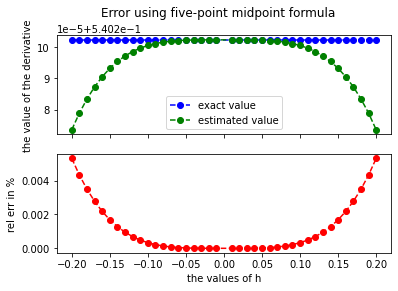

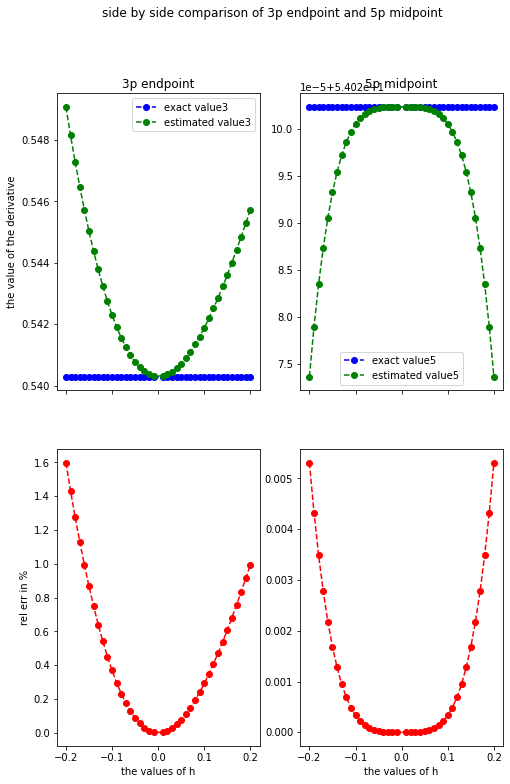

In [ ]:
ttl2="Error using five-point midpoint formula"
plot_error(hvec,df2.iloc[2],df2.iloc[1],df2.iloc[4],ttl2)

def plot_error2(X,Y,Y1,Z,ttl1,YY,YY1,ZZ,ttl2,tl):
  fig, axs=plt.subplots(nrows=2,ncols=2,figsize= (8,12),sharex=True)
  axs[0,0].plot(X,Y,'bo--',label='exact value3')
  axs[0,0].plot(X,Y1,'go--',label='estimated value3')
  axs[0,0].set_ylabel("the value of the derivative")
  axs[0,0].legend()
  axs[0,0].set_title(ttl1)
  
  axs[1,0].plot(X,Z,'ro--')
  axs[1,0].set_ylabel("rel err in %")
  axs[1,0].set_xlabel("the values of h")
  
  
  axs[0,1].set_title(ttl2)
  axs[0,1].plot(X,YY,'bo--',label='exact value5')
  axs[0,1].plot(X,YY1,'go--',label='estimated value5')
  axs[0,1].legend()

  axs[1,1].plot(X,ZZ,"ro--")
  axs[1,1].set_xlabel("the values of h")
  
  
  fig.suptitle(tl)
  plt.show()

ttl="side by side comparison of 3p endpoint and 5p midpoint"
plot_error2(hvec,df1.iloc[2],df1.iloc[1],df1.iloc[4],'3p endpoint',df2.iloc[2],df2.iloc[1],df2.iloc[4],"5p midpoint",ttl)

Based on the graphs above, we can conclude that

1. **As the h approaches 0**, the difference between "exact" value(np.cos(x)) and estimated differentiatio value decreases. (applied to both 3-point endpoint and 5-point midpoint formulas; $-0.2\le h\le 0.2$ with a step-size of 0.01). 

**Please note that I do not mean h gets really closes to 0 when I say "approaches to 0".**

It can be also justified by looking at rel err in % graphs: the graphs reach their mininum when h approaches 0.

2. **5-point midpoint formula does a better job in approximating the derivative of the function at the given value**, compared with three-point endpoint formulae.

Compared rel err in % for 3p endpoint and 5p midpoint side by side, we can see rel error resulted from 5p midpoint is much smaller than that resulted from 3p endpoint.

# Analysis and Discussion 1: selection of h and error

Here is what we have discussed in class(see proofs from textbooks)

1. **Three-point endpoint formula:**

$f’(x0)=\frac{1}{2h} \times [-3f(x0)+4f(x0+h)-f(x0+2h)]+\frac{h^2}{3}f'''(\xi0)$

$\xi0$ lies between x0 and x0+2h

2. **Three-point midpoint formula**

$f’(x0)=\frac{1}{2h} \times [f(x0+h)-f(x0-h)]+\frac{h^2}{6}f'''(\xi1)$

$\xi1$ lies between x0-h and x0+h

Comparing three-point endpoint with three-point midpoint, three-point midpoint uses points on both sides of x0 and thus have the error half as one from the three-point endpoint.

3. **Five-point midpoint formula**

$f’(x0)=\frac{1}{12h} \times [f(x0-2h)-8f(x0-h)+8f(x0+h)-f(x0+2h)]+\frac{h^4}{30}f'''''(\xi)$

$\xi$ lies between x0-2h and x0+2h

**Discussion about the selection of h values**

Now you probably have a general sense of fairly good h values: -0.1< h <0.1. 

Let us zoom in a bit in this region and see how h affects the accuracy of our results.

**Please note that h in the interval we choose will be "discrete" instead of "continuous" because we are doing numerical analysis.**

Zoom in -0.1<h<0.1 for both 3p and 5p

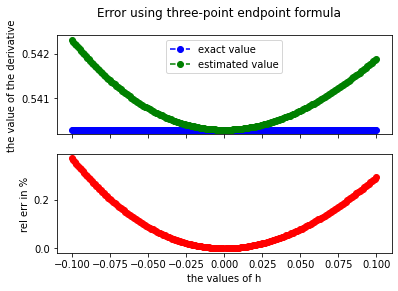

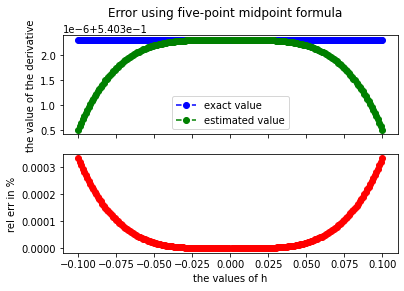

for 3p endpoint
the index of minimum rel error in % is: 100
the optimal h in this interval is 0.001
for 5p midpoint
the index of minimum rel error in % is: 99
the optimal h in this interval is -0.001


In [ ]:
newh=np.arange(-100,101,1)/1000
newh=newh[newh!=0]

fpe1=threep_end_multiple(func,1,newh)
df11=pd.DataFrame(np.zeros((5,200)),['h','3-p endpoint value','exact value','abs error','rel error in%'],)
df11.loc['h']=newh
df11.loc['3-p endpoint value']=fpe1
df11.loc['exact value']=dexact
df11.loc['abs error']=abs(df11.loc['3-p endpoint value']-df11.loc['exact value'])
df11.loc['rel error in%']=df11.loc['abs error']/df11.loc['3-p endpoint value']*100
#print(df11)
plot_error(newh,df11.iloc[2],df11.iloc[1],df11.iloc[4],ttl1)

fpm1=fivep_mid_mul(func,1,newh)
df21=pd.DataFrame(np.zeros((5,200)),['h','5-p midpoint value','exact value','abs error','rel error in%'],)
df21.loc['h']=newh
df21.loc['5-p midpoint value']=fpm1
df21.loc['exact value']=dexact
df21.loc['abs error']=abs(df21.loc['5-p midpoint value']-df21.loc['exact value'])
df21.loc['rel error in%']=df21.loc['abs error']/df21.loc['5-p midpoint value']*100
plot_error(newh,df21.iloc[2],df21.iloc[1],df21.iloc[4],ttl2)

def find_idxmin(lst,hvec):
  lst=list(lst)
  minerror=min(lst)
  idxmin=lst.index(minerror)
  print("the index of minimum rel error in % is:",idxmin)
  print("the optimal h in this interval is",hvec[idxmin])

lst=df11.iloc[4]
print("for 3p endpoint")
find_idxmin(lst,newh)
lst1=df21.iloc[4]
print("for 5p midpoint")
find_idxmin(lst1,newh)


zoom in -0.003<h<0.003 for both 3p and 5p

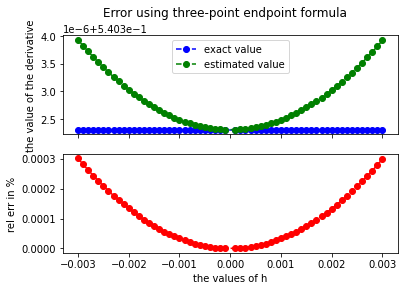

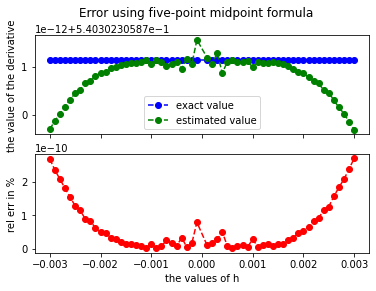

for 3p endpoint
the index of minimum rel error in % is: 29
the optimal h in this interval is -0.0001
for 5p midpoint
the index of minimum rel error in % is: 19
the optimal h in this interval is -0.0011


In [ ]:
newh1=np.arange(-30,31,1)/10000
newh1=newh1[newh1!=0]
len(newh1)
fpe11=threep_end_multiple(func,1,newh1)
df111=pd.DataFrame(np.zeros((5,60)),['h','3-p endpoint value','exact value','abs error','rel error in%'],)
df111.loc['h']=newh1
df111.loc['3-p endpoint value']=fpe11
df111.loc['exact value']=dexact
df111.loc['abs error']=abs(df111.loc['3-p endpoint value']-df111.loc['exact value'])
df111.loc['rel error in%']=df111.loc['abs error']/df111.loc['3-p endpoint value']*100
plot_error(newh1,df111.iloc[2],df111.iloc[1],df111.iloc[4],ttl1)

fpm11=fivep_mid_mul(func,1,newh1)
df211=pd.DataFrame(np.zeros((5,60)),['h','5-p midpoint value','exact value','abs error','rel error in%'],)
df211.loc['h']=newh1
df211.loc['5-p midpoint value']=fpm11
df211.loc['exact value']=dexact
df211.loc['abs error']=abs(df211.loc['5-p midpoint value']-df211.loc['exact value'])
df211.loc['rel error in%']=df211.loc['abs error']/df211.loc['5-p midpoint value']*100
plot_error(newh1,df211.iloc[2],df211.iloc[1],df211.iloc[4],ttl2)

lst2=df111.iloc[4]
lst3=df211.iloc[4]

print("for 3p endpoint")
find_idxmin(lst2,newh1)
print("for 5p midpoint")
find_idxmin(lst3,newh1)

zoom in -0.0003<h<0.0003 for 3p endpoint

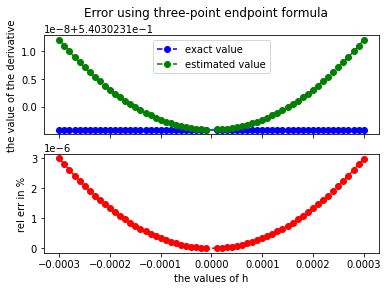

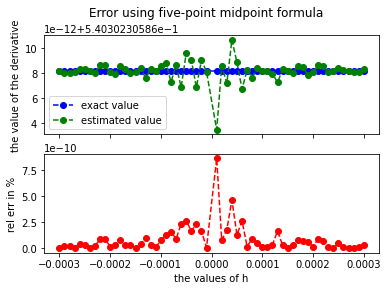

for 3p endpoint
the index of minimum rel error in % is: 29
the optimal h in this interval is -1e-05
for 5p midpoint
the index of minimum rel error in % is: 6
the optimal h in this interval is -0.00024


In [ ]:
newh2=np.arange(-30,31,1)/100000
newh2=newh2[newh2!=0]
newh2

fpe12=threep_end_multiple(func,1,newh2)
df112=pd.DataFrame(np.zeros((5,60)),['h','3-p endpoint value','exact value','abs error','rel error in%'],)
df112.loc['h']=newh2
df112.loc['3-p endpoint value']=fpe12
df112.loc['exact value']=dexact
df112.loc['abs error']=abs(df112.loc['3-p endpoint value']-df112.loc['exact value'])
df112.loc['rel error in%']=df112.loc['abs error']/df112.loc['3-p endpoint value']*100
plot_error(newh2,df112.iloc[2],df112.iloc[1],df112.iloc[4],ttl1)

fpm12=fivep_mid_mul(func,1,newh2)
df212=pd.DataFrame(np.zeros((5,60)),['h','5-p midpoint value','exact value','abs error','rel error in%'],)
df212.loc['h']=newh2
df212.loc['5-p midpoint value']=fpm12
df212.loc['exact value']=dexact
df212.loc['abs error']=abs(df212.loc['5-p midpoint value']-df212.loc['exact value'])
df212.loc['rel error in%']=df212.loc['abs error']/df212.loc['5-p midpoint value']*100
plot_error(newh2,df212.iloc[2],df212.iloc[1],df212.iloc[4],ttl2)

lst4=df112.iloc[4]
lst5=df212.iloc[4]

print("for 3p endpoint")
find_idxmin(lst4,newh2)
print("for 5p midpoint")
find_idxmin(lst5,newh2)



zoom in -0.00003<h<0.00003 

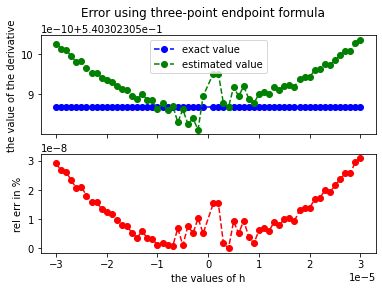

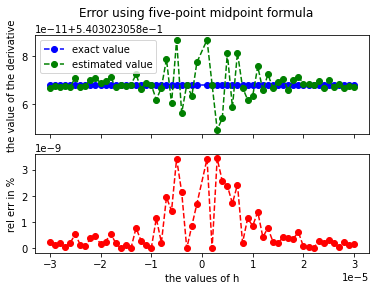

for 3p endpoint
the index of minimum rel error in % is: 33
the optimal h in this interval is 4e-06
for 5p midpoint
the index of minimum rel error in % is: 14
the optimal h in this interval is -1.6e-05


In [ ]:
newh3=np.arange(-30,31,1)/1000000
newh3=newh3[newh3!=0]
newh3

fpe13=threep_end_multiple(func,1,newh3)
df113=pd.DataFrame(np.zeros((5,60)),['h','3-p endpoint value','exact value','abs error','rel error in%'],)
df113.loc['h']=newh3
df113.loc['3-p endpoint value']=fpe13
df113.loc['exact value']=dexact
df113.loc['abs error']=abs(df113.loc['3-p endpoint value']-df113.loc['exact value'])
df113.loc['rel error in%']=df113.loc['abs error']/df113.loc['3-p endpoint value']*100
plot_error(newh3,df113.iloc[2],df113.iloc[1],df113.iloc[4],ttl1)


fpm13=fivep_mid_mul(func,1,newh3)
df213=pd.DataFrame(np.zeros((5,60)),['h','5-p midpoint value','exact value','abs error','rel error in%'],)
df213.loc['h']=newh3
df213.loc['5-p midpoint value']=fpm13
df213.loc['exact value']=dexact
df213.loc['abs error']=abs(df213.loc['5-p midpoint value']-df213.loc['exact value'])
df213.loc['rel error in%']=df213.loc['abs error']/df213.loc['5-p midpoint value']*100
plot_error(newh3,df213.iloc[2],df213.iloc[1],df213.iloc[4],ttl2)

lst6=df113.iloc[4]
lst7=df213.iloc[4]

print("for 3p endpoint")
find_idxmin(lst6,newh3)
print("for 5p midpoint")
find_idxmin(lst7,newh3)

After zooming in several times, we can see **the rel err in % is not approaching to 0(which is the minimum rel err in %), as h approaches 0.**

This is consistent with what we have discussed in the class: numerical differentiation approximation is highly susceptible to the rounding error when h is small.

**Reducing h reduces truncation error but increases round-off error and vice versa.**

For example, let us consider the three point midpoint approximation.

$f’(x0)=\frac{1}{2h} \times [f(x0+h)-f(x0-h)]+\frac{h^2}{6}f'''(\xi1)$

$\xi1$ lies between x0-h and x0+h

Assume that we encounter roundoff errors in evaluating f(x0+h) and f(x0-h) and denote the roundoff errors as e(x0+h) and e(x0-h).

$f(x0\pm h)=\bar{f}(x0\pm h)+e(x0 \pm h)$

$e_t=f'(x_0)-\frac{\bar{f}(x_0+h)-\bar{f}(x_0-h)}{2h}$

$=\frac{e(x_0+h)-e(x_0-h)}{2h}-\frac{h^2}{6}f'''(\xi_1)=e_r+e_c$

$e_t$ is the total error, $e_r$ is rounding error, and $e_c$ is truncation error.

$e_t=e_r+e_c\le\frac{\xi}{h}+\frac{h^2}{6}M$

**To reduce truncation error, we reduce h; however, when h is reduced, the roundoff error $\frac{\xi}{h}$ grows.**

Applied to five-point midpoint formula as well.

For a five-point midpoint(see proof from class slide), we have

$e_t=e_r+e_c\le\frac{3\xi}{2h}+\frac{h^4}{30}M$ 

# Analysis and Discussion 2: comparison of 3p-endpoint and 5p-midpoint 

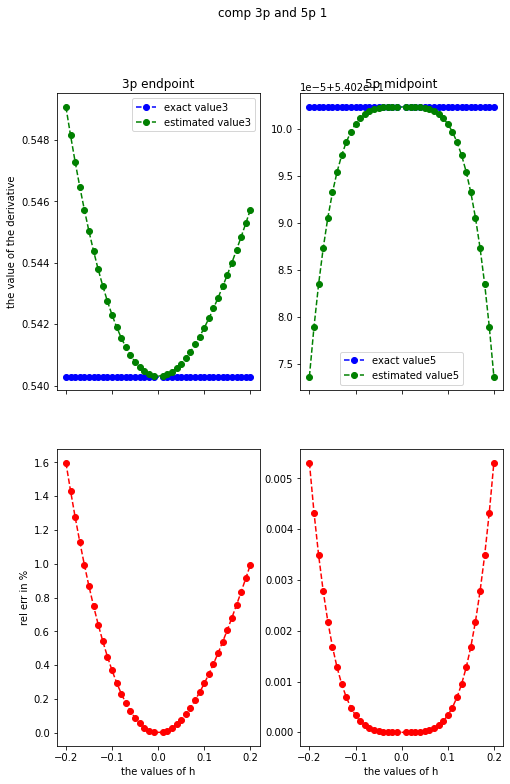

In [ ]:
plot_error2(hvec,df1.iloc[2],df1.iloc[1],df1.iloc[4],'3p endpoint',df2.iloc[2],df2.iloc[1],df2.iloc[4],"5p midpoint","comp 3p and 5p 1")

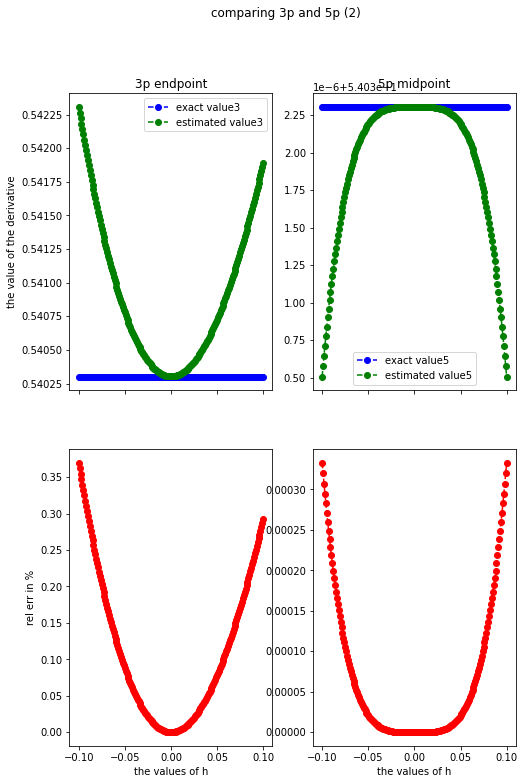

In [ ]:
plot_error2(newh,df11.iloc[2],df11.iloc[1],df11.iloc[4],'3p endpoint',df21.iloc[2],df21.iloc[1],df21.iloc[4],"5p midpoint","comparing 3p and 5p (2)")

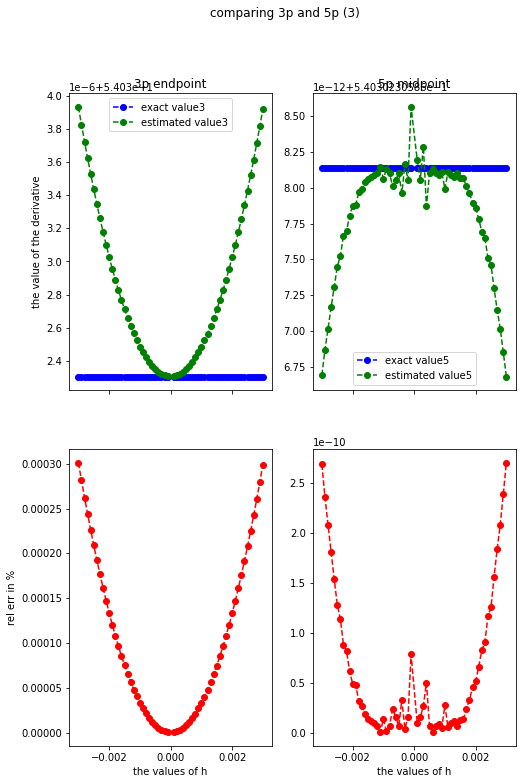

In [ ]:
plot_error2(newh1,df111.iloc[2],df111.iloc[1],df111.iloc[4],'3p endpoint',df211.iloc[2],df211.iloc[1],df211.iloc[4],"5p midpoint","comparing 3p and 5p (3)")

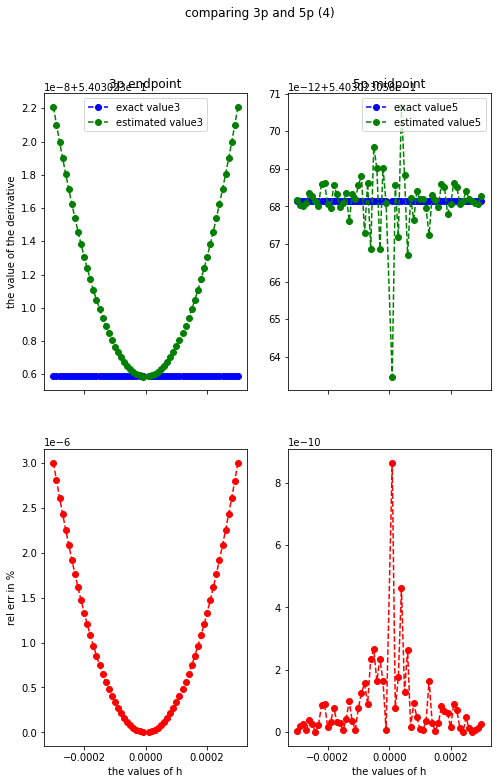

In [ ]:
plot_error2(newh2,df112.iloc[2],df112.iloc[1],df112.iloc[4],'3p endpoint',df212.iloc[2],df212.iloc[1],df212.iloc[4],"5p midpoint","comparing 3p and 5p (4)")

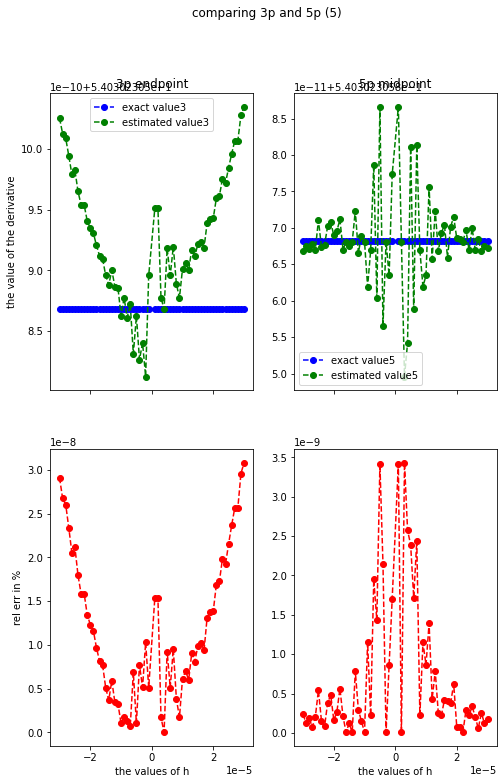

In [ ]:
plot_error2(newh3,df113.iloc[2],df113.iloc[1],df113.iloc[4],'3p endpoint',df213.iloc[2],df213.iloc[1],df213.iloc[4],"5p midpoint","comparing 3p and 5p (5)")

When comparing zoom-in cases of three-point endpoint and five-point midpoint estimations side by side, we have observed that 5-p midpoint is doing a better job.

**But why? **

The error term in 5p midpoint in $O(h^4)$ while the error term in 3p endpoint is $O(h^2)$. The higher the degree, the more accuracte the result is.

# Conclusion and Future Research

Here is the summary of our discovery.

1. **selection of h**(see more details in "Three numerical differentiation methods" and "Analysis and Discussion 1" sections)
*   **as h->0,** we are moving toward more accurate results. **Please note that I do not mean h gets really closes to 0 when I say "approaches to 0".**
*   **roundoff error instability**: reducing h reduces truncation error but increases roundoff error.
2. **3p endpoint vs 5p midpoint**(see more details in "Analysis and Discussion 2" section)
5p midpoint does a better job than 3p endpoint in approximating the derivtive of a funciton at a given value. $O(h^2)$ vs $O(h^4)$

**Future Research:**
1. **Other numerical differentiation techniques**

There are other numerical differentiation methods as well. It will be nice to compare them with 3p-endpoint and 5p-midpoint so that we can have a fuller picture.
2. **A function of multiple variables**

For this project, we are doing numerical differentiation for a function of one variable(f(x)). If we are doing numerically for a function of multiple variables(f(x1,x2,...xn)), how will the numerical differentiation formulas look like? How do we derive those formulas? **"Finite Difference" formulas** for a function of multiple variables can be found in wikipedia.

source: https://en.wikipedia.org/wiki/Finite_difference
3. **Applications of numerical differentiation**(tangentially related)

When I was doing the project, I was constantly thinking about the applications of numerical differentiation, which may be helpful in deciding what I want to do for my final project. 
*  **Interest in optimization**

I took math 366 last semester and was introduced to the concept of optimization, which has a myriad of applications, such as machine learning, operation research, and etc. 
*  **Finding local/max numerically**

When taking the calculus sequence, we have learned how to find local max/min("optimization" without contraints) of a function symbolically. Now let us do it numerically.

> (1) **finding the critical point**: if we are trying to solve the problem symbolically, we would first take the derivative of the function and set the first derivative to 0(first derivative for a function of one variable and gradient for a function of multiple variables).

> Now we can use numerical differentiation to find the derivative. And then we can use **Newton's method**(see other methods in "Eqn of a single variable" slides) to solve for the roots. 
Newton's Methods: $x_n=x_m-\frac{f(x_m)}{f'(x_m)}$ where m=n-1 and we want to solve for f(x)=0

> As you may have noticed, we need to solve for f'(x)=0 instead of f(x)=0; modifications need to be done on Newton's method. $x_n=x_m-\frac{f'(x_m)}{f''(x_m)}$ and there are multiple numerical ways to find the second derivatives(the derivative of the first derivative).


> (2)**calculate the second derivative at critical points**: if we are solving the problem symbolically, we would calculate the value of the second derivative at critical points to see whether or not we have a local min/max. If the sec derivative is pos, local min; if the sec derivative is neg, local max; if the sec derivative is 0, inconclusive(only applies to a function of single variable).

> if we have a function of multiple variables, instead of calculating the sec derivative, we would rely on the Hessian, a matrix that is symmetric. (source: https://en.wikipedia.org/wiki/Hessian_matrix). If the eigenvalues of hessian matrix are all positive, "positive definite" and local min; if the eigenvalues of a hessian matrix are all neg, "neg definite" and local max; if the eigenvalues of a hessian matrix are pos and neg, "indefinite" and saddle points. **Please note we only care about the eigenvalues of Hessian.** Approximation of eigenvalues will also be encountered later in the course. 

*   **Final thought about numerical optimization**

As we have discussed so far, calculation of local min/max numerically for a given function will involve a lot of concepts encountered in the course, numerical differentiation("finite differences"), Newton's method(or other methods such as Bisection, secant), approx of eigenvalues. Multiple varibles would also add additional layer of complexity to the problem.